In [1]:
import numpy as np
import pandas as pd
import nltk
import string
import random
import copy

In [11]:
df = pd.read_csv('data.csv', low_memory=False)
df = df.sample(len(df)//32,random_state=0)
df = df.reset_index(drop=True)

In [12]:
df.describe()

,LowestSalary,HighestSalary
count,9952.000000,9952.000000
mean,65.574759,115.072347
std,50.966453,180.476991
min,0.000000,30.000000
25%,30.000000,40.000000
50%,60.000000,70.000000
75%,100.000000,120.000000
max,200.000000,999.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9952 entries, 0 to 9951
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 9952 non-null   object
 1   Title              9952 non-null   object
 2   Company            9576 non-null   object
 3   Date               9952 non-null   object
 4   Location           6204 non-null   object
 5   Area               3894 non-null   object
 6   Classification     6204 non-null   object
 7   SubClassification  6204 non-null   object
 8   Requirement        9952 non-null   object
 9   FullDescription    9420 non-null   object
 10  LowestSalary       9952 non-null   int64 
 11  HighestSalary      9952 non-null   int64 
 12  JobType            9421 non-null   object
dtypes: int64(2), object(11)
memory usage: 1010.9+ KB


In [14]:
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37515643,Forklift Drivers WANTED! ***FULL TIME OPPORTUN...,Australian Personnel Solutions,2018-10-19T00:00:00.000Z,Melbourne,Western Suburbs,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution",Our client is looking for an experienced count...,<p>Our client is based in Yarraville&nbsp;and ...,50,60,Contract/Temp
1,38154814,Delivery Lead/Iteration Manager,DIUS Computing Pty Ltd,2019-01-20T00:00:00.000Z,NaN,NaN,NaN,NaN,If you love all things Agile and have experien...,<p>DiUS is an Australian technology consultanc...,120,150,Full Time
2,37999957,"Local Manager. Permanent, Full time - Lower Hu...",Life Without Barriers,2019-01-02T00:00:00.000Z,NaN,NaN,NaN,NaN,Join our Lower Hunter team as a Local Manager ...,"<div id=""FlashContent"" class=""videoembed""><ifr...",100,120,Full Time
3,37936799&searchrequesttoken=57f67ab1-3cfd-4254...,Clinical Nurse Educator - Youth Justice,Correct Care Australasia,2018-12-14T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Healthcare & Medical,"Nursing - Psych, Forensic & Correctional Health",This is an exciting opportunity for a Clinical...,"<div id=""FlashContent"" class=""videoembed""><ifr...",0,30,Part Time
4,37680645,Graduate Project Engineer,NaN,2018-11-09T00:00:00.000Z,Melbourne,Western Suburbs,Engineering,Project Engineering,Elastomers Australia are currently seeking a G...,<p><strong>The Company</strong></p> <p>Elastom...,50,60,Full Time
5,38063057,Receptionist,Gough Property & Real Estate Recruiters,2019-01-09T00:00:00.000Z,NaN,NaN,NaN,NaN,** Entry Level Real Estate Reception roles SYD...,"<p style=""text-align:center;"">Do you want a br...",40,50,Full Time
6,38079997,Principal Engineer Operations Planning,Powerlink,2019-01-10T00:00:00.000Z,NaN,NaN,NaN,NaN,Critical expert role to keep Queensland's HV t...,"<p>Powerlink, and its predecessor companies ha...",150,200,Contract/Temp
7,38068325,Forklift Operator with Admin Experience,Toll,2019-01-10T00:00:00.000Z,NaN,NaN,NaN,NaN,Immediate start / Morning shift available / Ex...,<p><strong>About the company</strong></p>\n ...,30,40,Full Time
8,37409088,Retail Goods Receiving / Warehouse - Springwood,Total Tools - Store Network,2018-10-08T00:00:00.000Z,Brisbane,Southern Suburbs & Logan,Retail & Consumer Products,Other,Utilise your goods receiving experience and wa...,<p><strong>About the Role</strong></p>\n ...,40,50,Full Time
9,37449308,Commercial Manager - Oil & Gas - PNG based,Amida,2018-10-12T00:00:00.000Z,Brisbane,NaN,"Mining, Resources & Energy",Management,Exciting opportunity to work with a reputable ...,<p>Our client is a large and established organ...,200,999,Full Time


In [15]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37515643,Forklift Drivers WANTED! ***FULL TIME OPPORTUN...,Australian Personnel Solutions,2018-10-19,Melbourne,Western Suburbs,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution",Our client is looking for an experienced count...,<p>Our client is based in Yarraville&nbsp;and ...,50,60,Contract/Temp
1,38154814,Delivery Lead/Iteration Manager,DIUS Computing Pty Ltd,2019-01-20,NaN,NaN,NaN,NaN,If you love all things Agile and have experien...,<p>DiUS is an Australian technology consultanc...,120,150,Full Time
2,37999957,"Local Manager. Permanent, Full time - Lower Hu...",Life Without Barriers,2019-01-02,NaN,NaN,NaN,NaN,Join our Lower Hunter team as a Local Manager ...,"<div id=""FlashContent"" class=""videoembed""><ifr...",100,120,Full Time
3,37936799&searchrequesttoken=57f67ab1-3cfd-4254...,Clinical Nurse Educator - Youth Justice,Correct Care Australasia,2018-12-14,Melbourne,CBD & Inner Suburbs,Healthcare & Medical,"Nursing - Psych, Forensic & Correctional Health",This is an exciting opportunity for a Clinical...,"<div id=""FlashContent"" class=""videoembed""><ifr...",0,30,Part Time
4,37680645,Graduate Project Engineer,NaN,2018-11-09,Melbourne,Western Suburbs,Engineering,Project Engineering,Elastomers Australia are currently seeking a G...,<p><strong>The Company</strong></p> <p>Elastom...,50,60,Full Time
5,38063057,Receptionist,Gough Property & Real Estate Recruiters,2019-01-09,NaN,NaN,NaN,NaN,** Entry Level Real Estate Reception roles SYD...,"<p style=""text-align:center;"">Do you want a br...",40,50,Full Time
6,38079997,Principal Engineer Operations Planning,Powerlink,2019-01-10,NaN,NaN,NaN,NaN,Critical expert role to keep Queensland's HV t...,"<p>Powerlink, and its predecessor companies ha...",150,200,Contract/Temp
7,38068325,Forklift Operator with Admin Experience,Toll,2019-01-10,NaN,NaN,NaN,NaN,Immediate start / Morning shift available / Ex...,<p><strong>About the company</strong></p>\n ...,30,40,Full Time
8,37409088,Retail Goods Receiving / Warehouse - Springwood,Total Tools - Store Network,2018-10-08,Brisbane,Southern Suburbs & Logan,Retail & Consumer Products,Other,Utilise your goods receiving experience and wa...,<p><strong>About the Role</strong></p>\n ...,40,50,Full Time
9,37449308,Commercial Manager - Oil & Gas - PNG based,Amida,2018-10-12,Brisbane,NaN,"Mining, Resources & Energy",Management,Exciting opportunity to work with a reputable ...,<p>Our client is a large and established organ...,200,999,Full Time


In [17]:
df['Id'] = df['Id'].astype('int64')

ValueError: invalid literal for int() with base 10: '37936799&searchrequesttoken=57f67ab1-3cfd-4254-92f5-47028699aadd'

In [18]:
tf = df['Id']
for e,x in enumerate(tf):
    if len(x) > 8:
        tf[e] = x[:8]
df['Id'] = df['Id'].astype('int64')

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1339/2600484877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf[e] = x[:8]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9952 entries, 0 to 9951
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Id                 9952 non-null   int64         
 1   Title              9952 non-null   object        
 2   Company            9576 non-null   object        
 3   Date               9952 non-null   datetime64[ns]
 4   Location           6204 non-null   object        
 5   Area               3894 non-null   object        
 6   Classification     6204 non-null   object        
 7   SubClassification  6204 non-null   object        
 8   Requirement        9952 non-null   object        
 9   FullDescription    9420 non-null   object        
 10  LowestSalary       9952 non-null   int64         
 11  HighestSalary      9952 non-null   int64         
 12  JobType            9421 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 1010.9+

In [20]:
df[df['LowestSalary'] > df['HighestSalary']].shape[0]

0

In [21]:
df[df.duplicated()]

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType


In [22]:
df.drop_duplicates()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37515643,Forklift Drivers WANTED! ***FULL TIME OPPORTUN...,Australian Personnel Solutions,2018-10-19,Melbourne,Western Suburbs,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution",Our client is looking for an experienced count...,<p>Our client is based in Yarraville&nbsp;and ...,50,60,Contract/Temp
1,38154814,Delivery Lead/Iteration Manager,DIUS Computing Pty Ltd,2019-01-20,NaN,NaN,NaN,NaN,If you love all things Agile and have experien...,<p>DiUS is an Australian technology consultanc...,120,150,Full Time
2,37999957,"Local Manager. Permanent, Full time - Lower Hu...",Life Without Barriers,2019-01-02,NaN,NaN,NaN,NaN,Join our Lower Hunter team as a Local Manager ...,"<div id=""FlashContent"" class=""videoembed""><ifr...",100,120,Full Time
3,37936799,Clinical Nurse Educator - Youth Justice,Correct Care Australasia,2018-12-14,Melbourne,CBD & Inner Suburbs,Healthcare & Medical,"Nursing - Psych, Forensic & Correctional Health",This is an exciting opportunity for a Clinical...,"<div id=""FlashContent"" class=""videoembed""><ifr...",0,30,Part Time
4,37680645,Graduate Project Engineer,NaN,2018-11-09,Melbourne,Western Suburbs,Engineering,Project Engineering,Elastomers Australia are currently seeking a G...,<p><strong>The Company</strong></p> <p>Elastom...,50,60,Full Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,37996752,Motor Mechanic / Automotive Technician,FLB Automotive Recruitment Pty Ltd,2018-12-31,NaN,NaN,NaN,NaN,Fantastic opportunity for an experienced motor...,<p>We have a fantastic opportunity for an expe...,0,30,Full Time
9948,37928224,Auto Electrician,Programmed Skilled Workforce,2018-12-13,Perth,Eastern Suburbs,"Mining, Resources & Energy",Mining - Engineering & Maintenance,Are you looking for an opportunity in Perth af...,<p><strong>Programmed Skilled Workforce</stron...,120,150,Full Time
9949,37587496,DA/VIZ Operator,Seven West Media Limited,2018-10-30,Sydney,"CBD, Inner West & Eastern Suburbs","Advertising, Arts & Media",Programming & Production,This position is varied and will perform the d...,"<div id=""FlashContent"" class=""videoembed""><ifr...",70,80,Full Time
9950,38012389,Quality Assurance Officer,Real Pet Food Company,2019-01-03,NaN,NaN,NaN,NaN,Awesome opportunity for a passionate and exper...,<p><strong>About the company:</strong></p>\n ...,50,60,Full Time


In [23]:
df.isnull().sum()

Id                      0
Title                   0
Company               376
Date                    0
Location             3748
Area                 6058
Classification       3748
SubClassification    3748
Requirement             0
FullDescription       532
LowestSalary            0
HighestSalary           0
JobType               531
dtype: int64

In [24]:
df.describe()

,Id,LowestSalary,HighestSalary
count,9.952000e+03,9952.000000,9952.000000
mean,3.779744e+07,65.574759,115.072347
std,2.934618e+05,50.966453,180.476991
min,3.684559e+07,0.000000,30.000000
25%,3.751094e+07,30.000000,40.000000
50%,3.788894e+07,60.000000,70.000000
75%,3.801222e+07,100.000000,120.000000
max,3.856223e+07,200.000000,999.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9952 entries, 0 to 9951
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Id                 9952 non-null   int64         
 1   Title              9952 non-null   object        
 2   Company            9576 non-null   object        
 3   Date               9952 non-null   datetime64[ns]
 4   Location           6204 non-null   object        
 5   Area               3894 non-null   object        
 6   Classification     6204 non-null   object        
 7   SubClassification  6204 non-null   object        
 8   Requirement        9952 non-null   object        
 9   FullDescription    9420 non-null   object        
 10  LowestSalary       9952 non-null   int64         
 11  HighestSalary      9952 non-null   int64         
 12  JobType            9421 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 1010.9+

In [26]:
df.fillna("Other", inplace = True)
df.isnull().sum()

Id                   0
Title                0
Company              0
Date                 0
Location             0
Area                 0
Classification       0
SubClassification    0
Requirement          0
FullDescription      0
LowestSalary         0
HighestSalary        0
JobType              0
dtype: int64

In [27]:
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37515643,Forklift Drivers WANTED! ***FULL TIME OPPORTUN...,Australian Personnel Solutions,2018-10-19,Melbourne,Western Suburbs,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution",Our client is looking for an experienced count...,<p>Our client is based in Yarraville&nbsp;and ...,50,60,Contract/Temp
1,38154814,Delivery Lead/Iteration Manager,DIUS Computing Pty Ltd,2019-01-20,Other,Other,Other,Other,If you love all things Agile and have experien...,<p>DiUS is an Australian technology consultanc...,120,150,Full Time
2,37999957,"Local Manager. Permanent, Full time - Lower Hu...",Life Without Barriers,2019-01-02,Other,Other,Other,Other,Join our Lower Hunter team as a Local Manager ...,"<div id=""FlashContent"" class=""videoembed""><ifr...",100,120,Full Time
3,37936799,Clinical Nurse Educator - Youth Justice,Correct Care Australasia,2018-12-14,Melbourne,CBD & Inner Suburbs,Healthcare & Medical,"Nursing - Psych, Forensic & Correctional Health",This is an exciting opportunity for a Clinical...,"<div id=""FlashContent"" class=""videoembed""><ifr...",0,30,Part Time
4,37680645,Graduate Project Engineer,Other,2018-11-09,Melbourne,Western Suburbs,Engineering,Project Engineering,Elastomers Australia are currently seeking a G...,<p><strong>The Company</strong></p> <p>Elastom...,50,60,Full Time


In [28]:
df['FullDescription'][195]

'<p>The Division of Enterprise has the responsibility of Knowledge Exchange for Social Progress n Economic Prosperity, delivering from Research Excellence, as part of the University’s 2025 Strategy.</p>\n        <p>The Division will significantly increase the University’s knowledge exchange revenue over the next five years through broad partnership with research organisations, industry and government and help transform Australia\'s economic base.&nbsp;</p>\n        <p><strong>About the role</strong></p>\n        <p>The Business Development Manager will focus on identifying new partners and opportunities for UNSW technologies, R&amp;D, innovation and broader capability. &nbsp;They will leverage UNSW technologies and capability to build relationships with\n          external partners including industry, government and communities to generate revenue across all knowledge exchange channels. These include research partnerships (contract and collaborative) and IP commercialisation, as well a

In [29]:
def removeformatting(text):
    formats = []
    new = [0,0]
    result = text
    for e,x in enumerate(text):
        if x == '<':
            new[0] = e
        elif x == '>':
            new[1] = e
            formats.append(tuple(new))
        elif x == "\n":
            formats.append((e,e+1))
    
    for x in formats[::-1]:
        result = result[:x[0]]+result[x[1]+1:]
    return result

removeformatting(df['FullDescription'][195])

"The Division of Enterprise has the responsibility of Knowledge Exchange for Social Progress n Economic Prosperity, delivering from Research Excellence, as part of the University’s 2025 Strategy.       The Division will significantly increase the University’s knowledge exchange revenue over the next five years through broad partnership with research organisations, industry and government and help transform Australia's economic base.&nbsp;       About the role       The Business Development Manager will focus on identifying new partners and opportunities for UNSW technologies, R&amp;D, innovation and broader capability. &nbsp;They will leverage UNSW technologies and capability to build relationships with         external partners including industry, government and communities to generate revenue across all knowledge exchange channels. These include research partnerships (contract and collaborative) and IP commercialisation, as well as consulting and         continuing education.&nbsp; A

In [30]:
tf = df['FullDescription']
for e,x in enumerate(tf):
    tf[e] = removeformatting(x)
df['FullDescription'][195]

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1339/3110567988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf[e] = removeformatting(x)


"The Division of Enterprise has the responsibility of Knowledge Exchange for Social Progress n Economic Prosperity, delivering from Research Excellence, as part of the University’s 2025 Strategy.       The Division will significantly increase the University’s knowledge exchange revenue over the next five years through broad partnership with research organisations, industry and government and help transform Australia's economic base.&nbsp;       About the role       The Business Development Manager will focus on identifying new partners and opportunities for UNSW technologies, R&amp;D, innovation and broader capability. &nbsp;They will leverage UNSW technologies and capability to build relationships with         external partners including industry, government and communities to generate revenue across all knowledge exchange channels. These include research partnerships (contract and collaborative) and IP commercialisation, as well as consulting and         continuing education.&nbsp; A

In [31]:
tf = df['FullDescription']
tokens = []
for e,s in enumerate(tf):
    token = nltk.word_tokenize(s)
    s = s.translate(str.maketrans('', '', string.punctuation))
    token = nltk.word_tokenize(s)
    token = [x for x in token if x not in nltk.corpus.stopwords.words('english')]
    lemma = nltk.stem.WordNetLemmatizer()
    token = [lemma.lemmatize(x) for x in token]
    tokens.append(token)
df['FullDescription'] = tokens
df['FullDescription'][195]

['The',
 'Division',
 'Enterprise',
 'responsibility',
 'Knowledge',
 'Exchange',
 'Social',
 'Progress',
 'n',
 'Economic',
 'Prosperity',
 'delivering',
 'Research',
 'Excellence',
 'part',
 'University',
 '’',
 '2025',
 'Strategy',
 'The',
 'Division',
 'significantly',
 'increase',
 'University',
 '’',
 'knowledge',
 'exchange',
 'revenue',
 'next',
 'five',
 'year',
 'broad',
 'partnership',
 'research',
 'organisation',
 'industry',
 'government',
 'help',
 'transform',
 'Australias',
 'economic',
 'basenbsp',
 'About',
 'role',
 'The',
 'Business',
 'Development',
 'Manager',
 'focus',
 'identifying',
 'new',
 'partner',
 'opportunity',
 'UNSW',
 'technology',
 'RampD',
 'innovation',
 'broader',
 'capability',
 'nbspThey',
 'leverage',
 'UNSW',
 'technology',
 'capability',
 'build',
 'relationship',
 'external',
 'partner',
 'including',
 'industry',
 'government',
 'community',
 'generate',
 'revenue',
 'across',
 'knowledge',
 'exchange',
 'channel',
 'These',
 'include',
 '

In [32]:
df.to_csv('preprocessed.csv',index=False)

In [33]:
print(len(df["Title"].unique()))
print(len(df["Company"].unique()))
print(df["Location"].unique())
print(df["Area"].unique())
print(df["Classification"].unique())
print(df["SubClassification"].unique())
print(df["JobType"].unique())

8411
4536
['Melbourne' 'Other' 'Brisbane' 'Wollongong, Illawarra & South Coast'
 'Perth' 'Sydney' 'ACT' 'Newcastle, Maitland & Hunter'
 'Bendigo, Goldfields & Macedon Ranges' 'Blue Mountains & Central West'
 'Southern Highlands & Tablelands' 'Port Hedland, Karratha & Pilbara'
 'Launceston & North East' 'Horsham & Grampians'
 'Coober Pedy & Outback SA' 'Adelaide' 'Northern QLD'
 'Bairnsdale & Gippsland' 'Rockhampton & Capricorn Coast' 'Gold Coast'
 'Mackay & Coalfields' 'Bundaberg & Wide Bay Burnett'
 'Gosford & Central Coast' 'Darwin' 'Bunbury & South West'
 'Cairns & Far North' 'Whyalla & Eyre Peninsula' 'Hobart'
 'South West Coast VIC' 'Yarra Valley & High Country'
 'Katherine & Northern Australia' 'Sunshine Coast'
 'Port Macquarie & Mid North Coast' 'Mildura & Murray'
 'West Gippsland & Latrobe Valley' 'Ballarat & Central Highlands'
 'Adelaide Hills & Barossa' 'Dubbo & Central NSW'
 'Geraldton, Gascoyne & Midwest' 'Gladstone & Central QLD'
 'Mt Gambier & Limestone Coast' 'Shepparton

### Part II

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df2 = pd.read_csv("preprocessed.csv")

In [4]:
#df['AverageSalary'] = 
df2.head(5)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37515643,Forklift Drivers WANTED! ***FULL TIME OPPORTUN...,Australian Personnel Solutions,2018-10-19,Melbourne,Western Suburbs,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution",Our client is looking for an experienced count...,"['Our', 'client', 'based', 'Yarravillenbspand'...",50,60,Contract/Temp
1,38154814,Delivery Lead/Iteration Manager,DIUS Computing Pty Ltd,2019-01-20,Other,Other,Other,Other,If you love all things Agile and have experien...,"['DiUS', 'Australian', 'technology', 'consulta...",120,150,Full Time
2,37999957,"Local Manager. Permanent, Full time - Lower Hu...",Life Without Barriers,2019-01-02,Other,Other,Other,Other,Join our Lower Hunter team as a Local Manager ...,"['About', 'thenbspOrganisation', 'Life', 'With...",100,120,Full Time
3,37936799,Clinical Nurse Educator - Youth Justice,Correct Care Australasia,2018-12-14,Melbourne,CBD & Inner Suburbs,Healthcare & Medical,"Nursing - Psych, Forensic & Correctional Health",This is an exciting opportunity for a Clinical...,"['Correct', 'Care', 'Australasia', 'Correct', ...",0,30,Part Time
4,37680645,Graduate Project Engineer,Other,2018-11-09,Melbourne,Western Suburbs,Engineering,Project Engineering,Elastomers Australia are currently seeking a G...,"['The', 'Company', 'Elastomers', 'Australia', ...",50,60,Full Time


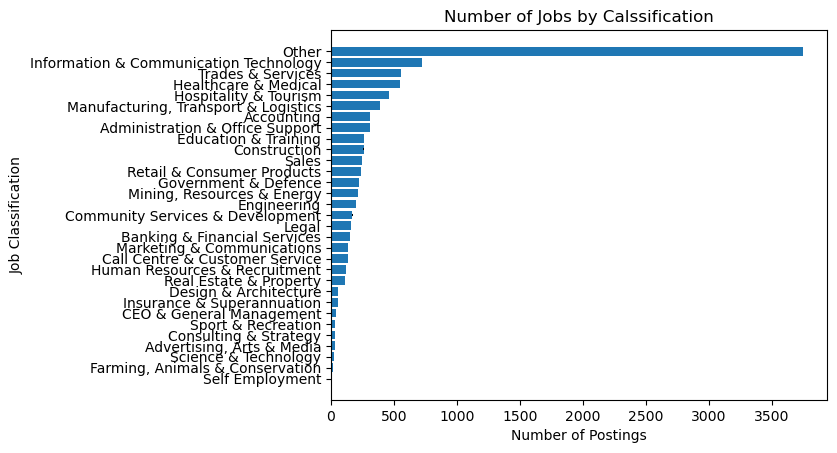

In [5]:
%matplotlib inline


# # ------------------------
# sns.set_theme(style="darkgrid")
# #titanic = sns.load_dataset("titanic")
# plt.figure(figsize = (20,15))
# ax = sns.countplot(x="Company", data=df2)
# #plt.xticks(rotation=45)
# #ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
# # ------------------------
jobNums = df2['Classification'].value_counts()

## Adapted
## https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html
##

# Fixing random state for reproducibility
#np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(jobNums.index))
industry = jobNums.values
error = np.random.rand(len(jobNums.index))

ax.barh(y_pos, industry, xerr=error, align='center')
ax.set_yticks(y_pos, labels=jobNums.index)#people
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Postings')
ax.set_ylabel('Job Classification')
ax.set_title('Number of Jobs by Calssification')

plt.show()
